In [1]:
%matplotlib inline
import random
from synthetic_data import load_data_by_gtype, GRID
from utils import infeciton_time2weight
from plot_utils import plot_snapshot, add_colorbar
from ic import make_partial_cascade
from query_strategy import expected_infection_time, maximal_adversarial_query

In [2]:
g, probas, node2id = load_data_by_gtype(GRID)
id2node = {i: n for n, i in node2id.items()}
source, obs_nodes, infection_times, tree = make_partial_cascade(
    g, fraction=0.05, sampling_method='late_nodes')

In [3]:
mu = np.zeros(g.number_of_nodes())
cand_sources = random.sample(list(range(g.number_of_nodes())), 3)
for i in cand_sources:
    mu[i] = 1 / len(cand_sources)

In [4]:
best_query, query2penalty = maximal_adversarial_query(
    g, probas, mu, obs_nodes, infection_times, node2id, id2node)

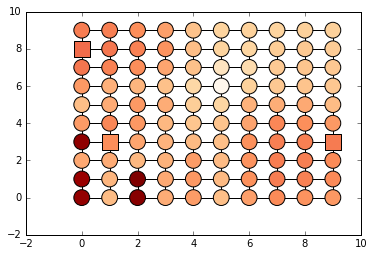

In [6]:
pos = {n: np.array(n) for n in g.nodes()}
plot_snapshot(g, node2weight=query2penalty, pos=pos, queried_nodes=[id2node[i] for i in cand_sources])